[課題のURL](https://diver.diveintocode.jp/curriculums/1636)

# Week3授業課題 信用情報の分析

* Home Creditはどのような企業？

クライアントのローンの返済能力を予測する企業

* このコンペティションでは何を予測する？

ローンの返済能力

* それを予測することで企業が得られるメリットは何？

返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となる

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 【問題2】データの概観の把握

* データの取得

In [2]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('application_train.csv', index_col=0)
#df = pd.read_csv('application_train.csv')

* データセット自体の調査

In [3]:
df.shape

(307511, 121)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [5]:
df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
#df.dtypes

* データの欠損値の有無を見る

In [8]:
# 欠損値の割合

print("missing_ration")
na_columns = (df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)) /307511
na_columns

missing_ration


COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_AV

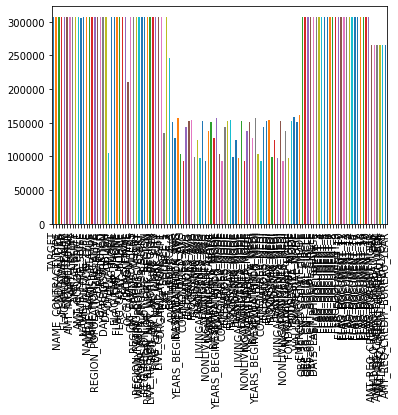

In [9]:
# 欠損値の概要

list_temp = df.count(axis=0)
list_temp.plot.bar()

* クラスごとのデータ数をグラフに出す

1 - client with payment difficulties:  
he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample,   
0 - all other cases

* installments of the loan:ローンの分割払い

0    282686
1     24825
Name: TARGET, dtype: int64


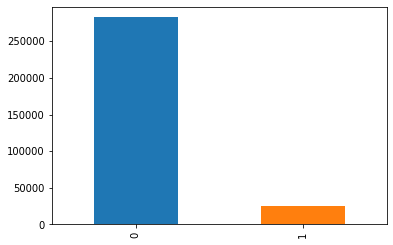

In [10]:
#target0 = df['TARGET'] == 0
#print(target0.sum)

vc = df['TARGET'].value_counts()
print(vc)
#print(type(vc))

vc.plot.bar()


# 【問題3】課題設定

* 1, 収入と返済に関係はあるか → 差異はなさそう
* 2, ローンの総額と返済に関係はあるか → 差異はなさそう
* 4, 自動車の所有と返済に関係はあるか → 差異はなさそう
* 5, 不動産(家やフラット)の所有と返済に関係はあるか → 差異はなさそう
* 8, 住む場所(人口密度の差異)と返済に関係はあるか → 差異はなさそう   
* 11, 仕事用の電話の所持と返済に関係はあるか → 差異はなさそう
* 12, 自宅の電話の所持と返済に関係はあるか → 差異はなさそう  
→財産の有無と返済の遅延については関係がなさそう  
  
  
* 6, ローンを借りた人の人間関係と返済に関係はあるか → 差異はなさそう  
　"ローンを申し込みの際、誰を同伴したか"で人間関係が参照できると仮定
* 12, 家族人数と関係はあるか → 差異はなさそう 
→人間関係の観点については関係がなさそう

* 7, 学歴と返済に関係はあるか → 差異はなさそう
* 9, 勤続年数と返済に関係はあるか → 差異はなさそう
* 10, 支払い方法(キャッシュローン or リボルビングローン)と返済に関係はあるか → 差異はなさそう  
  計画性が参照できると仮定  
* 13, 契約書の不備(現住所と連絡先書の住所が一致しない)と返済に関係はあるか → 差異はなさそう  
* 14, 契約書の不備(現住所が勤務先住所と一致しない)と返済に関係はあるか → 差異はなさそう  
* 15, 契約書の不備(連絡先住所が勤務先住所と一致しない)と返済に関係はあるか → 差異はなさそう  
→個人の能力については関係がなさそう  
  
  
* 3, 性別と返済に関係はあるか → 若干、男性の方が多い(1 - client with payment difficulties)

# 【問題4】データ探索

* 問題3で設定した課題・疑問を解決するためにデータ探索を進めます。  
考察を伴う表やグラフを 15個以上 作成してください。  
→考察は"【問題3】課題設定"の欄に記述

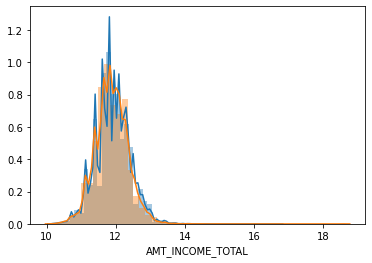

In [11]:
# 1, 収入と返済に関係はあるか

df_income0 = df["AMT_INCOME_TOTAL"][df["TARGET"] == 0]
df_income1 = df["AMT_INCOME_TOTAL"][df["TARGET"] == 1]

sns.distplot(np.log(df_income0))
sns.distplot(np.log(df_income1))

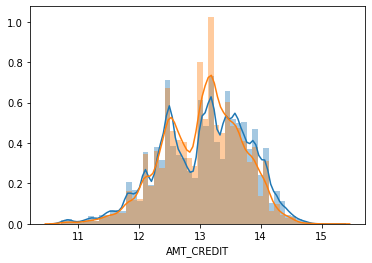

In [12]:
# 2, ローンの総額と返済に関係はあるか

df_amt_credit0 = df.loc[df["TARGET"] == 0, "AMT_CREDIT"]
df_amt_credit1 = df.loc[df["TARGET"] == 1, "AMT_CREDIT"]

sns.distplot(np.log(df_amt_credit0) )
sns.distplot(np.log(df_amt_credit1) )

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
  
0 - all other cases


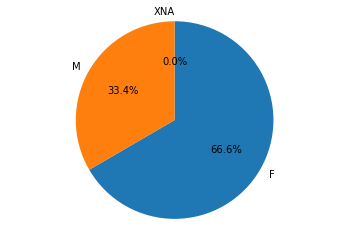

1 - client with payment difficulties


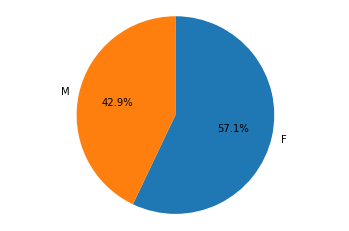

In [13]:
# 3, 性別と返済に関係はあるか

df_code_gender0 = df.loc[df["TARGET"] == 0, "CODE_GENDER"]
df_code_gender1 = df.loc[df["TARGET"] == 1, "CODE_GENDER"]

vc0 = df_code_gender0.value_counts()
print(vc0)

vc1 = df_code_gender1.value_counts()
print(vc1)
print("  ")

print("0 - all other cases")
label1 = ["F", "M", "XNA"]
x = np.array([vc0.F, vc0.M, vc0.XNA])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label2 = ["F", "M"]
x = np.array([vc1.F, vc1.M])
plt.pie(x, labels=label2, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
  
0 - all other cases


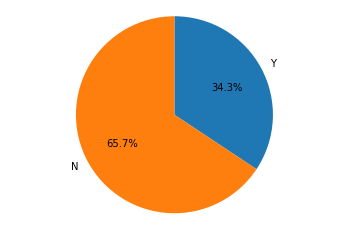

1 - client with payment difficulties


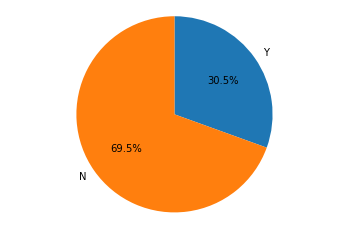

In [14]:
# 4, 自動車の所有と返済に関係はあるか

df_own_car0 = df.loc[df["TARGET"] == 0, "FLAG_OWN_CAR"]
df_own_car1 = df.loc[df["TARGET"] == 1, "FLAG_OWN_CAR"]

vc0 = df_own_car0.value_counts()
print(vc0)

vc1 = df_own_car1.value_counts()
print(vc1)
print("  ")

print("0 - all other cases")
label1 = ["Y", "N"]
x = np.array([vc0.Y, vc0.N])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label2 = ["Y", "N"]
x = np.array([vc1.Y, vc1.N])
plt.pie(x, labels=label2, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


Y    196329
N     86357
Name: FLAG_OWN_REALTY, dtype: int64
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64
  
0 - all other cases


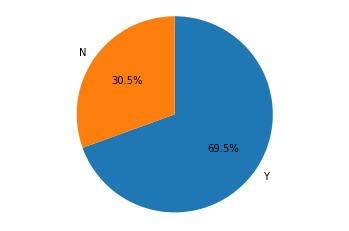

1 - client with payment difficulties


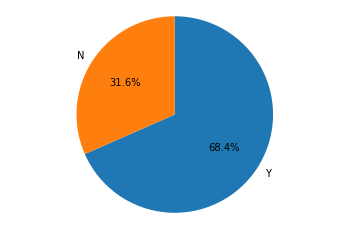

In [15]:
# 5, 不動産(家やフラット)の所有と返済に関係はあるか

df_own_realty0 = df.loc[df["TARGET"] == 0, "FLAG_OWN_REALTY"]
df_own_realty1 = df.loc[df["TARGET"] == 1, "FLAG_OWN_REALTY"]

vc0 = df_own_realty0.value_counts()
print(vc0)

vc1 = df_own_realty1.value_counts()
print(vc1)
print("  ")

print("0 - all other cases")
label1 = ["Y", "N"]
x = np.array([vc0.Y, vc0.N])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label2 = ["Y", "N"]
x = np.array([vc1.Y, vc1.N])
plt.pie(x, labels=label2, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

Unaccompanied      228189
Family              37140
Spouse, partner     10475
Children             3026
Other_B              1596
Other_A               790
Group of people       248
Name: NAME_TYPE_SUITE, dtype: int64
Unaccompanied      20337
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64
0 - all other cases


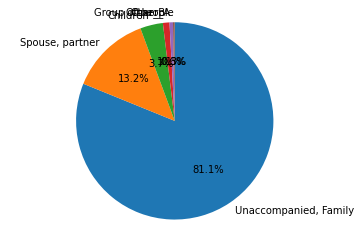

1 - client with payment difficulties


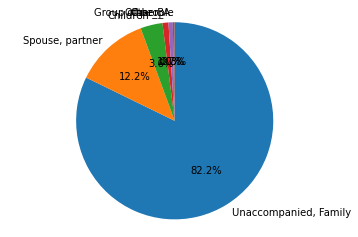

In [16]:
# 6, ローンを借りた人の人間関係と返済に関係はあるか → 差異はなさそう  
# "ローンを申し込みの際、誰を同伴したか"で人間関係が参照できると仮定  

df_name_type_suite0 = df.loc[df["TARGET"] == 0, "NAME_TYPE_SUITE"]
df_name_type_suite1 = df.loc[df["TARGET"] == 1, "NAME_TYPE_SUITE"]

vc0 = df_name_type_suite0.value_counts()
print(vc0)

vc1 = df_name_type_suite1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Unaccompanied, ""Family", "Spouse, partner", "Children", "Other_B", "Other_A", "Group of people"]
x = np.array([vc0[0], vc0[1], vc0[2], vc0[3], vc0[4], vc0[5]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label2 = ["Unaccompanied, ""Family", "Spouse, partner", "Children", "Other_B", "Other_A", "Group of people"]
x = np.array([vc1[0], vc1[1], vc1[2], vc1[3], vc1[4], vc1[5]])
plt.pie(x, labels=label2, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64
0 - all other cases


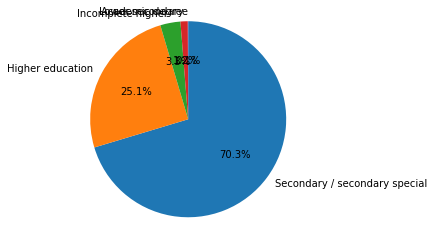

1 - client with payment difficulties


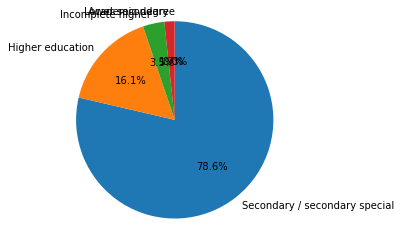

In [17]:
# 7, 学歴と返済に関係はあるか → 差異はなさそう  

df_education_type0 = df.loc[df["TARGET"] == 0, "NAME_EDUCATION_TYPE"]
df_education_type1 = df.loc[df["TARGET"] == 1, "NAME_EDUCATION_TYPE"]

vc0 = df_education_type0.value_counts()
print(vc0)

vc1 = df_education_type1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Secondary / secondary special", "Higher education" , "Incomplete higher", "Lower secondary", "Academic degree"]
x = np.array([vc0[0], vc0[1], vc0[2], vc0[3], vc0[4]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label2 = ["Secondary / secondary special", "Higher education" , "Incomplete higher", "Lower secondary", "Academic degree"]
x = np.array([vc1[0], vc1[1], vc1[2], vc1[3], vc1[4]])
plt.pie(x, labels=label2, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

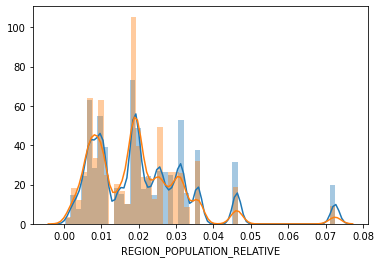

In [18]:
# 8, 住む場所(人口密度の差異)と返済に関係はあるか → 差異はなさそう  

df_region0 = df["REGION_POPULATION_RELATIVE"][df["TARGET"] == 0]
df_region1 = df["REGION_POPULATION_RELATIVE"][df["TARGET"] == 1]

sns.distplot(df_region0)
sns.distplot(df_region1)

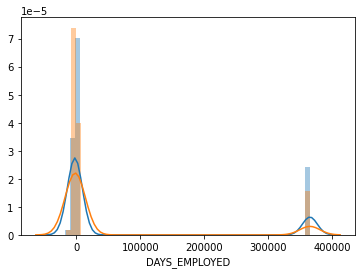

In [19]:
# 9, 勤続年数と返済に関係はあるか → 差異はなさそう  

df_employed0 = df["DAYS_EMPLOYED"][df["TARGET"] == 0]
df_employed1 = df["DAYS_EMPLOYED"][df["TARGET"] == 1]

#print(df_employed0)
#print("青:0, 赤:1")

sns.distplot(df_employed0)
sns.distplot(df_employed1)

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
0 - all other cases


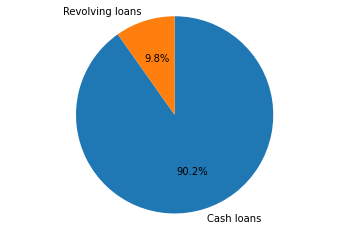

1 - client with payment difficulties


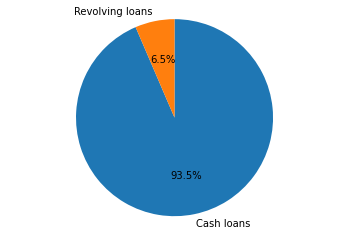

In [20]:
# 10, 支払い方法(キャッシュローン or リボルビングローン)と返済に関係はあるか → 差異はなさそう  

df_contract_type0 = df["NAME_CONTRACT_TYPE"][df["TARGET"] == 0]
df_contract_type1 = df["NAME_CONTRACT_TYPE"][df["TARGET"] == 1]

vc0 = df_contract_type0.value_counts()
print(vc0)

vc1 = df_contract_type1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Cash loans", "Revolving loans"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["Cash loans", "Revolving loans"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

1    230291
0     52395
Name: FLAG_EMP_PHONE, dtype: int64
1    21834
0     2991
Name: FLAG_EMP_PHONE, dtype: int64
0 - all other cases


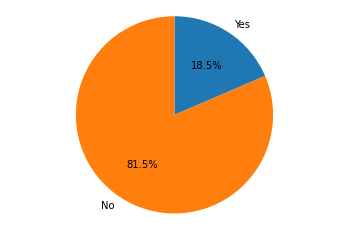

1 - client with payment difficulties


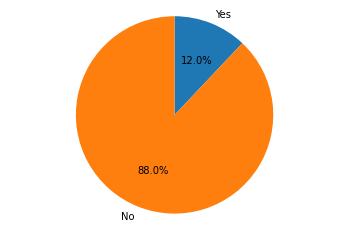

In [21]:
# 11, 仕事用の電話の所持と返済に関係はあるか → 差異はなさそう

df_emp_phone0 = df["FLAG_EMP_PHONE"][df["TARGET"] == 0]
df_emp_phone1 = df["FLAG_EMP_PHONE"][df["TARGET"] == 1]

vc0 = df_emp_phone0.value_counts()
print(vc0)

vc1 = df_emp_phone1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Yes", "No"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["Yes", "No"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


0    266618
1     16068
Name: FLAG_EMAIL, dtype: int64
0    23451
1     1374
Name: FLAG_EMAIL, dtype: int64
0 - all other cases


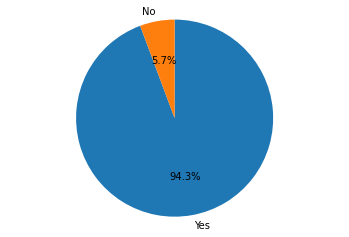

1 - client with payment difficulties


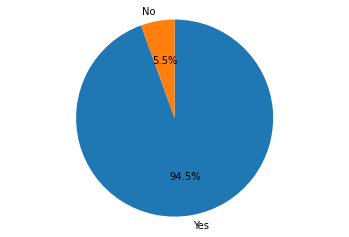

In [22]:
# 11, 仕事用の電話の所持と返済に関係はあるか → 差異はなさそう

df_email0 = df["FLAG_EMAIL"][df["TARGET"] == 0]
df_email1 = df["FLAG_EMAIL"][df["TARGET"] == 1]

vc0 = df_email0.value_counts()
print(vc0)

vc1 = df_email1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Yes", "No"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["Yes", "No"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

0    227282
1     55404
Name: FLAG_WORK_PHONE, dtype: int64
0    18921
1     5904
Name: FLAG_WORK_PHONE, dtype: int64
0 - all other cases


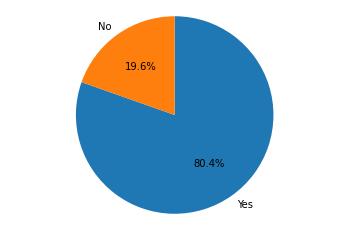

1 - client with payment difficulties


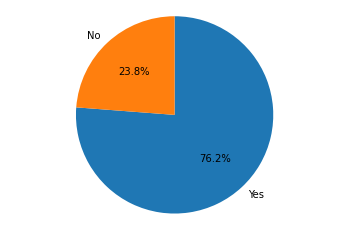

In [23]:
# 12, 自宅の電話の所持と返済に関係はあるか → 差異はなさそう

df_email0 = df["FLAG_WORK_PHONE"][df["TARGET"] == 0]
df_email1 = df["FLAG_WORK_PHONE"][df["TARGET"] == 1]

vc0 = df_email0.value_counts()
print(vc0)

vc1 = df_email1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["Yes", "No"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["Yes", "No"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

2.0     146348
1.0      62172
3.0      47993
4.0      22561
5.0       3151
6.0        353
7.0         75
8.0         14
9.0          6
12.0         2
20.0         2
10.0         2
16.0         2
14.0         2
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64


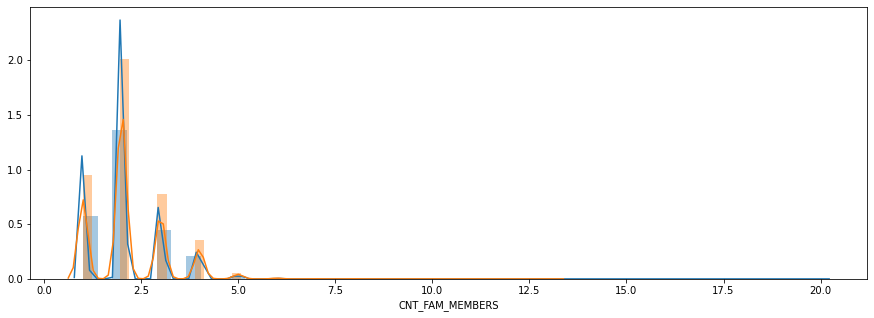

In [35]:
# 12, 家族人数と関係はあるか → 差異はなさそう

plt.figure(figsize=(15,5))

print(df["CNT_FAM_MEMBERS"][df["TARGET"] == 0].value_counts())
print(df["CNT_FAM_MEMBERS"][df["TARGET"] == 1].value_counts())

sns.distplot(df["CNT_FAM_MEMBERS"][df["TARGET"] == 0].dropna())
sns.distplot(df["CNT_FAM_MEMBERS"][df["TARGET"] == 1].dropna())

0    278462
1      4224
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
0    24392
1      433
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
0 - all other cases


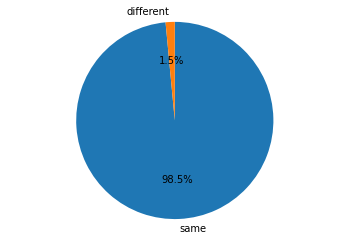

1 - client with payment difficulties


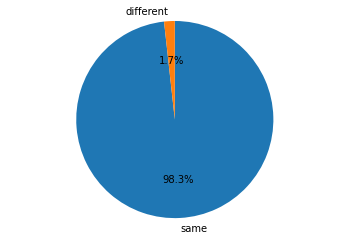

In [37]:
# 13, 契約書の不備(現住所と連絡先住所が一致しない)と返済に関係はあるか → 差異はなさそう

df_reg_not_live0 = df["REG_REGION_NOT_LIVE_REGION"][df["TARGET"] == 0]
df_reg_not_live1 = df["REG_REGION_NOT_LIVE_REGION"][df["TARGET"] == 1]

vc0 = df_reg_not_live0.value_counts()
print(vc0)

vc1 = df_reg_not_live1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["same", "different"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["same", "different"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


0    268462
1     14224
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
0    23437
1     1388
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
0 - all other cases


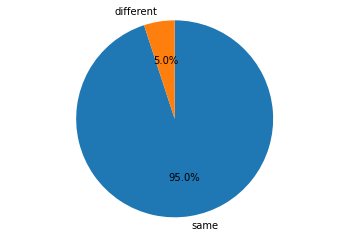

1 - client with payment difficulties


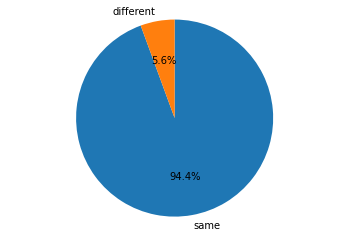

In [38]:
# 14, 契約書の不備(現住所が勤務先住所と一致しない)と返済に関係はあるか → 差異はなさそう

df_reg_not_work0 = df["REG_REGION_NOT_WORK_REGION"][df["TARGET"] == 0]
df_reg_not_work1 = df["REG_REGION_NOT_WORK_REGION"][df["TARGET"] == 1]

vc0 = df_reg_not_work0.value_counts()
print(vc0)

vc1 = df_reg_not_work1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["same", "different"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["same", "different"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

0    271239
1     11447
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0    23769
1     1056
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0 - all other cases


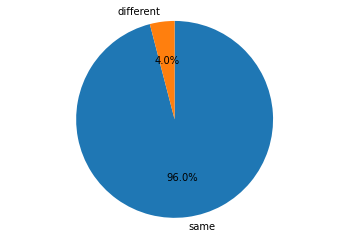

1 - client with payment difficulties


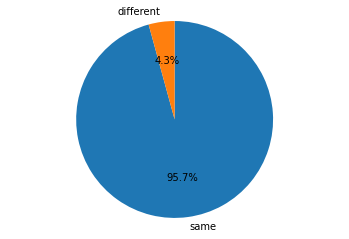

In [39]:
# 15, 契約書の不備(連絡先住所が勤務先住所と一致しない)と返済に関係はあるか → 差異はなさそう

df_live_not_work0 = df["LIVE_REGION_NOT_WORK_REGION"][df["TARGET"] == 0]
df_live_not_work1 = df["LIVE_REGION_NOT_WORK_REGION"][df["TARGET"] == 1]

vc0 = df_live_not_work0.value_counts()
print(vc0)

vc1 = df_live_not_work1.value_counts()
print(vc1)

print("0 - all other cases")
label1 = ["same", "different"]
x = np.array([vc0[0], vc0[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

print("1 - client with payment difficulties")
label1 = ["same", "different"]
x = np.array([vc1[0], vc1[1]])
plt.pie(x, labels=label1, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()